### Distribution of watermasses in observational data products
#### How they are changing over time

In [43]:
import xarray as xr
from xhistogram.xarray import histogram
import numpy as np
import so_decadal_variability.calc as socalc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from dask.diagnostics import ProgressBar

In [77]:
rootdir = '/local/projects/so_decadal_variability/'
product = 'en4'
# ocean
prefix = 'SO_ocean_*_'
filename = prefix+product+'*.nc'
ds = xr.open_mfdataset(rootdir+'ocean/'+filename)
# grid
prefix = 'SO_grid_*_'
filename = prefix+product+'*.nc'
grid = xr.open_mfdataset(rootdir+'grid/'+filename)

In [78]:
bins = {'gamman':np.arange(22,29,0.1),
       'ct':np.arange(-2,30,0.2),
       'sa':np.arange(30,36,0.05)}

In [81]:
binned = {}
for var in bins:
    binned[var] = histogram(
        ds[var],
        bins=[bins[var]],
        dim = ['depth','lat','lon'],
        weights=grid['vol4d'])

In [82]:
with ProgressBar():
    for var in bins:
        binned[var].load()

[########################################] | 100% Completed | 14.7s
[########################################] | 100% Completed | 17.0s
[########################################] | 100% Completed | 18.0s


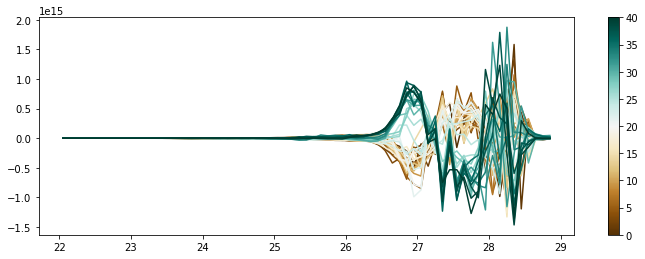

In [83]:
start = 0
stop = 1
N = len(socalc._annual(ds['time']))
colors = [ cm.BrBG(x) for x in np.linspace(start, stop, N) ]
sm = plt.cm.ScalarMappable(cmap=cm.BrBG, norm=plt.Normalize(vmin=0, vmax=N))

x = binned['gamman']['gamman_bin']
fig, ax = plt.subplots(figsize = (12,4))
for t in range(N):
    ax.plot(x,socalc._annualanom(binned['gamman']).isel(time=t),color=colors[t])
cbar = plt.colorbar(sm)

/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


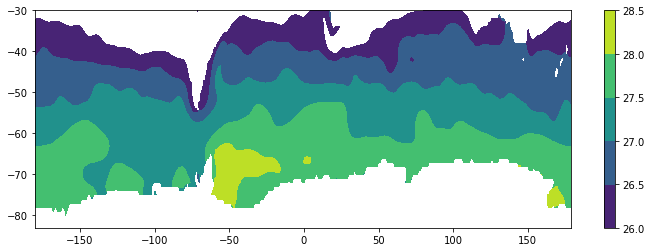

In [86]:
months = slice(6,9)
fig,ax = plt.subplots(figsize=(12,4))
X = ds['lon']
Y = ds['lat']
Z = ds['gamman'].sel(depth=slice(0,100)).mean('depth')
# Grab months
Z = Z.groupby('time.month').mean().isel(month=months).mean('month')
im = ax.contourf(X,Y,Z,levels=[26,26.5,27,27.5,28,28.5])
plt.colorbar(im,ax=ax)

In [69]:
Z

<xarray.DataArray 'gamman' (lat: 60, lon: 360)>
dask.array<getitem, shape=(60, 360), dtype=float32, chunksize=(60, 360), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 1979-01-01
  * lon      (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 ... -33.5 -32.5 -31.5 -30.5